In [1]:
import random

import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler


pipe = StableDiffusionPipeline.from_pretrained(
    "nota-ai/bk-sdm-tiny", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

2023-10-10 14:24:33.951066: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-10 14:24:34.009190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [18]:
latents = torch.load("dummy_latents.pt").to(pipe.vae.device).to(pipe.vae.dtype)

In [21]:
with torch.no_grad():
    image = pipe.vae.decode(
        latents / pipe.vae.config.scaling_factor, return_dict=False
    )[0]
    print(image.shape)
    image = pipe.image_processor.postprocess(
        image, output_type="pil", do_denormalize=[True] * 8
    )

torch.Size([8, 3, 512, 512])


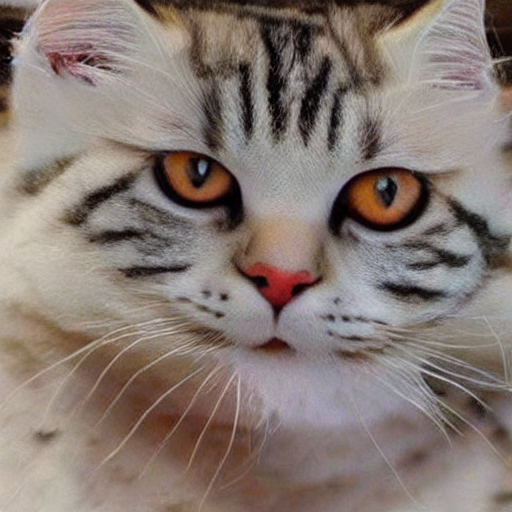

In [22]:
image[0]